<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-Packages" data-toc-modified-id="Install-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install Packages</a></span></li><li><span><a href="#Importing-Data" data-toc-modified-id="Importing-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Data</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Logistic-Model" data-toc-modified-id="Logistic-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic Model</a></span></li><li><span><a href="#Check-significance-of-indipendence" data-toc-modified-id="Check-significance-of-indipendence-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check significance of indipendence</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Prediction-Function" data-toc-modified-id="Prediction-Function-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Prediction Function</a></span></li><li><span><a href="#Estimate-Probability" data-toc-modified-id="Estimate-Probability-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Estimate Probability</a></span></li><li><span><a href="#Odds-Ratio" data-toc-modified-id="Odds-Ratio-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Odds-Ratio</a></span></li><li><span><a href="#Determine-Cut-Off-point" data-toc-modified-id="Determine-Cut-Off-point-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Determine Cut-Off point</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Source" data-toc-modified-id="Source-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Source</a></span></li></ul></div>

# Install Packages

In [1]:
install.packages('ggcorrplot')
library(ggcorrplot)

Installing package into 'C:/Users/anton/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpGOCm8a\downloaded_packages


Warning message:
"package 'ggcorrplot' was built under R version 4.1.3"
Loading required package: ggplot2



# Importing Data

In [2]:
Data = read.csv(file= "C:\\Users\\anton\\Desktop\\JupyterNotebook\\Statistics\\STATISTIC TABA\\Default.csv",sep=",")

In [3]:
head(Data)

,ï..gender,age,ed,retire,income,creddebt,othdebt,default,marital,homeown
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,0,75,16,1,13,0.497250,0.828750,0,1,1
2,1,63,13,1,55,1.390125,2.734875,0,1,1
3,0,53,15,0,36,0.418644,0.625356,0,1,1
4,1,61,16,0,33,0.075504,1.376496,0,0,1
5,0,31,15,0,20,0.204680,2.175320,0,0,0
6,1,46,10,0,54,0.754272,3.133728,0,0,1


In [4]:
sapply(Data,function(x) sum(is.na(x)))

ï..gender       age        ed    retire    income  creddebt   othdebt   default 
        0         0         0         0         0         0         0         0 
  marital   homeown 
        0         0

In [5]:
colnames(Data)[1] <- "gender"

# Data Analysis 

In [6]:
summary(Data)

     gender            age              ed            retire      
 Min.   :0.0000   Min.   :18.00   Min.   : 6.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:28.00   1st Qu.:12.00   1st Qu.:0.0000  
 Median :1.0000   Median :42.00   Median :15.00   Median :0.0000  
 Mean   :0.5175   Mean   :43.91   Mean   :14.76   Mean   :0.1136  
 3rd Qu.:1.0000   3rd Qu.:58.00   3rd Qu.:17.00   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :79.00   Max.   :23.00   Max.   :1.0000  
     income           creddebt            othdebt            default    
 Min.   :   9.00   Min.   :  0.00136   Min.   :  0.0167   Min.   :0.00  
 1st Qu.:  23.00   1st Qu.:  0.42412   1st Qu.:  1.0539   1st Qu.:0.00  
 Median :  37.00   Median :  1.00036   Median :  2.1961   Median :0.00  
 Mean   :  54.69   Mean   :  2.20815   Mean   :  3.9295   Mean   :0.43  
 3rd Qu.:  64.00   3rd Qu.:  2.27236   3rd Qu.:  4.6438   3rd Qu.:1.00  
 Max.   :1073.00   Max.   :109.07260   Max.   :141.4591   Max.   :1.00  
    marital         

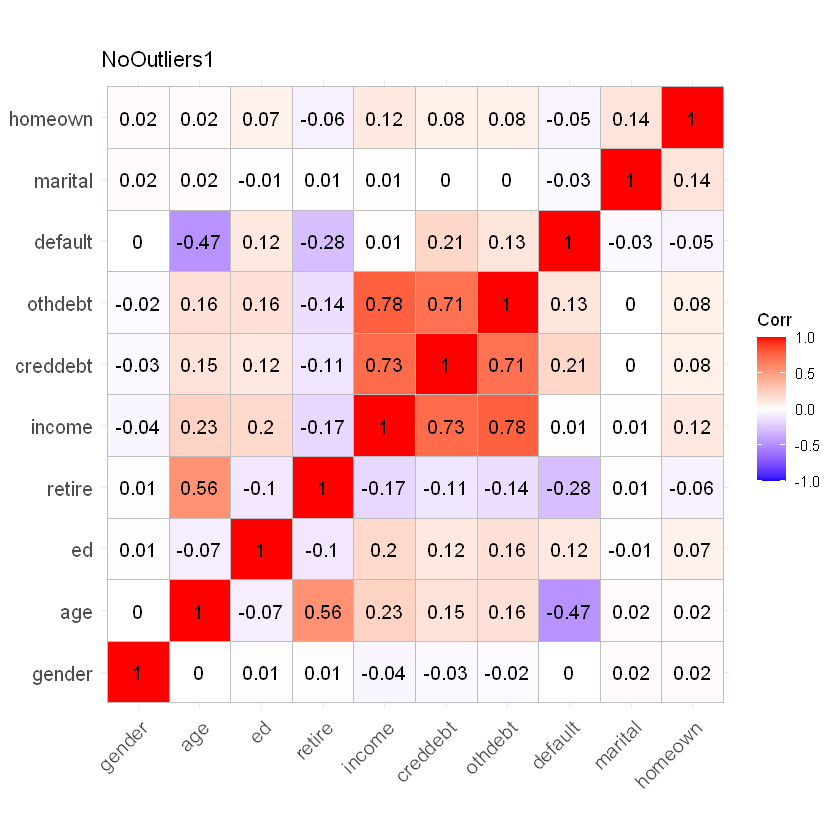

In [7]:
IncomeDataCorr <- cor(Data, use = 'pairwise.complete.obs')
ggcorrplot(IncomeDataCorr, title="NoOutliers1", lab = TRUE)

In [8]:
#Data = subset(Data, select = -c(creddebt ,othdebt) )
head(Data)

,gender,age,ed,retire,income,creddebt,othdebt,default,marital,homeown
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,0,75,16,1,13,0.497250,0.828750,0,1,1
2,1,63,13,1,55,1.390125,2.734875,0,1,1
3,0,53,15,0,36,0.418644,0.625356,0,1,1
4,1,61,16,0,33,0.075504,1.376496,0,0,1
5,0,31,15,0,20,0.204680,2.175320,0,0,0
6,1,46,10,0,54,0.754272,3.133728,0,0,1


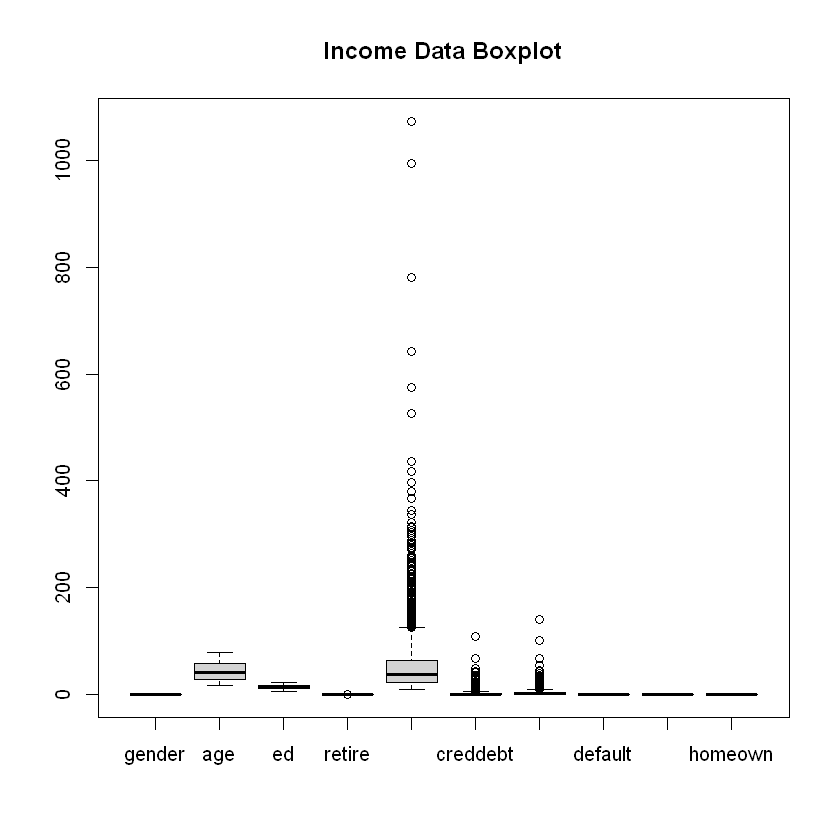

In [9]:
boxplot(Data, main="Income Data Boxplot")

In [10]:
Data=subset(Data, income<=100)

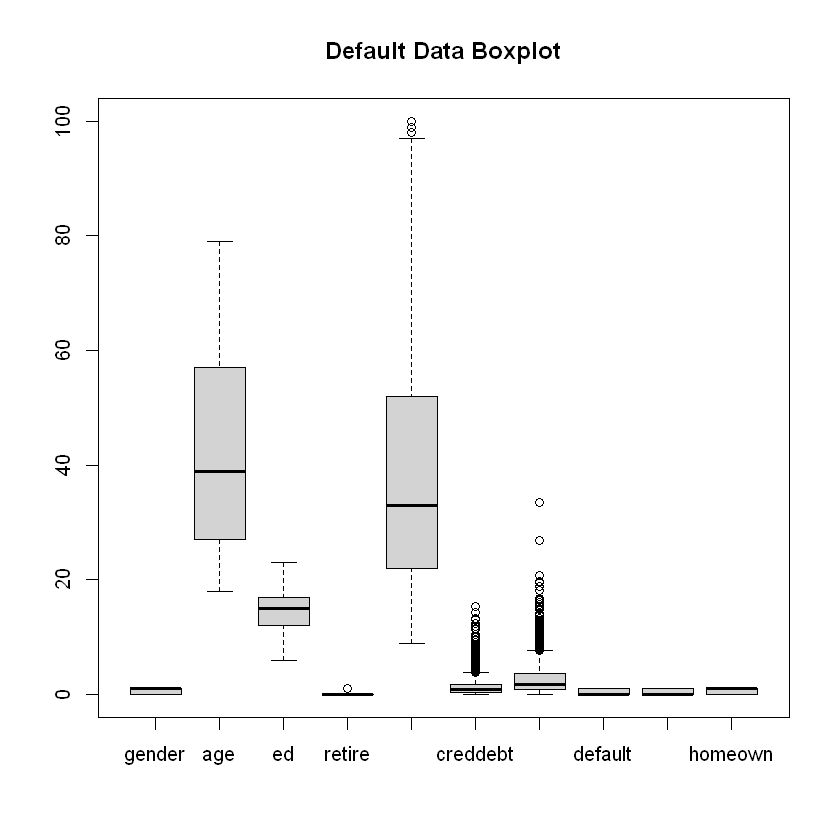

In [11]:
boxplot(Data, main="Default Data Boxplot")

# Logistic Model

In [12]:
logit <- glm(default ~ gender + age + ed + retire + income + marital + homeown + creddebt + othdebt, data=Data, family='binomial')
summary(logit)


Call:
glm(formula = default ~ gender + age + ed + retire + income + 
    marital + homeown + creddebt + othdebt, family = "binomial", 
    data = Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2630  -0.7209  -0.2251   0.7877   2.7856  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.900643   0.295449   6.433 1.25e-10 ***
gender      -0.037799   0.104967  -0.360  0.71877    
age         -0.079211   0.004904 -16.152  < 2e-16 ***
ed           0.084018   0.017314   4.852 1.22e-06 ***
retire      -0.493899   0.344591  -1.433  0.15178    
income      -0.033661   0.003857  -8.728  < 2e-16 ***
marital      0.008473   0.105776   0.080  0.93615    
homeown     -0.336484   0.108504  -3.101  0.00193 ** 
creddebt     0.583602   0.046892  12.446  < 2e-16 ***
othdebt      0.157020   0.024975   6.287 3.24e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

In [13]:
anova(logit, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,2407,3293.380,NA
gender,1,0.06212489,2406,3293.318,8.031685e-01
age,1,678.28713812,2405,2615.031,1.575487e-149
ed,1,16.89926563,2404,2598.131,3.941683e-05
retire,1,5.71938525,2403,2592.412,1.677860e-02
income,1,0.07665836,2402,2592.335,7.818780e-01
marital,1,0.57838379,2401,2591.757,4.469465e-01
homeown,1,9.54925473,2400,2582.208,2.000306e-03
creddebt,1,302.63253367,2399,2279.575,8.795067e-68


In [14]:
logit <- glm(default ~ gender + age + ed + retire + income + marital + homeown, data=Data, family='binomial')
summary(logit)


Call:
glm(formula = default ~ gender + age + ed + retire + income + 
    marital + homeown, family = "binomial", data = Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7970  -0.8899  -0.2955   0.8831   2.5802  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.806294   0.275538   6.556 5.55e-11 ***
gender      -0.018827   0.096255  -0.196 0.844927    
age         -0.069089   0.004374 -15.794  < 2e-16 ***
ed           0.060651   0.015710   3.861 0.000113 ***
retire      -0.669917   0.329421  -2.034 0.041990 *  
income       0.001299   0.002716   0.478 0.632546    
marital     -0.035224   0.096990  -0.363 0.716477    
homeown     -0.309418   0.100299  -3.085 0.002036 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3293.4  on 2407  degrees of freedom
Residual deviance: 2582.2  on 2400  degrees of freedom
AIC: 2598.2

Number of

In [15]:
#remove marital
logit <- glm(default ~ gender + age + ed + retire + income + homeown, data=Data, family='binomial')
summary(logit)


Call:
glm(formula = default ~ gender + age + ed + retire + income + 
    homeown, family = "binomial", data = Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7917  -0.8899  -0.2957   0.8800   2.5735  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.792186   0.272703   6.572 4.97e-11 ***
gender      -0.021637   0.095936  -0.226 0.821564    
age         -0.069113   0.004373 -15.803  < 2e-16 ***
ed           0.060793   0.015704   3.871 0.000108 ***
retire      -0.669793   0.329362  -2.034 0.041992 *  
income       0.001312   0.002715   0.483 0.628937    
homeown     -0.313988   0.099501  -3.156 0.001601 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3293.4  on 2407  degrees of freedom
Residual deviance: 2582.3  on 2401  degrees of freedom
AIC: 2596.3

Number of Fisher Scoring iterations: 5


In [16]:
#remove retire
logit <- glm(default ~ gender + age + ed + income + homeown, data=Data, family='binomial')
summary(logit)


Call:
glm(formula = default ~ gender + age + ed + income + homeown, 
    family = "binomial", data = Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8256  -0.8696  -0.3377   0.8764   2.4272  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.897405   0.268772   7.060 1.67e-12 ***
gender      -0.023212   0.096019  -0.242 0.808980    
age         -0.074390   0.003643 -20.423  < 2e-16 ***
ed           0.058885   0.015672   3.757 0.000172 ***
income       0.003649   0.002472   1.476 0.139863    
homeown     -0.310629   0.099539  -3.121 0.001804 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3293.4  on 2407  degrees of freedom
Residual deviance: 2586.8  on 2402  degrees of freedom
AIC: 2598.8

Number of Fisher Scoring iterations: 5


In [17]:
#remove gender
logit <- glm(default ~ age + ed + income + homeown, data=Data, family='binomial')
summary(logit)


Call:
glm(formula = default ~ age + ed + income + homeown, family = "binomial", 
    data = Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8204  -0.8670  -0.3378   0.8776   2.4325  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.886966   0.265212   7.115 1.12e-12 ***
age         -0.074395   0.003642 -20.426  < 2e-16 ***
ed           0.058742   0.015660   3.751 0.000176 ***
income       0.003672   0.002470   1.486 0.137156    
homeown     -0.310984   0.099529  -3.125 0.001781 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3293.4  on 2407  degrees of freedom
Residual deviance: 2586.9  on 2403  degrees of freedom
AIC: 2596.9

Number of Fisher Scoring iterations: 5


In [18]:
#remove income
#final model
logit <- glm(default ~ age + ed + homeown, data=Data, family='binomial')
summary(logit)


Call:
glm(formula = default ~ age + ed + homeown, family = "binomial", 
    data = Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8023  -0.8644  -0.3570   0.8707   2.3638  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.873597   0.264559   7.082 1.42e-12 ***
age         -0.072514   0.003352 -21.630  < 2e-16 ***
ed           0.064334   0.015205   4.231 2.33e-05 ***
homeown     -0.299075   0.099198  -3.015  0.00257 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3293.4  on 2407  degrees of freedom
Residual deviance: 2589.1  on 2404  degrees of freedom
AIC: 2597.1

Number of Fisher Scoring iterations: 4


In [19]:
actual <- Data$default
predicted <- round(fitted(logit))
xt <- xtabs(~ actual + predicted)
accuracy <- (xt[1,1]+xt[2,2])/sum(xt)
accuracy

[1] 0.7267442

# Check significance of indipendence

In [20]:
summary <- summary(logit)

In [21]:
names(summary)

[1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "deviance.resid" "coefficients"  
[13] "aliased"        "dispersion"     "df"             "cov.unscaled"  
[17] "cov.scaled"

In [22]:
summary$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.87359666,0.264559029,7.081961,1.421289e-12
age,-0.07251362,0.003352412,-21.630281,9.321337e-104
ed,0.06433393,0.015205328,4.231012,2.326419e-05
homeown,-0.29907535,0.099197579,-3.014946,2.570249e-03


In [23]:
summary(logit)$coefficients[,4]

(Intercept)           age            ed       homeown 
 1.421289e-12 9.321337e-104  2.326419e-05  2.570249e-03

In [24]:
significant <- function(alpha)
{ all(summary(logit)$coefficients[,4]<alpha) }

In [25]:
significant(0.05)

[1] TRUE

In [26]:
significant(0.01)

[1] TRUE

In [27]:
significant(0.005)

[1] TRUE

# Model Evaluation

In [28]:
actual <- Data$default
predicted <- round(fitted(logit))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual    0    1
     0 1006  362
     1  296  744

In [29]:
accuracy <- (xt[1,1]+xt[2,2])/sum(xt)
accuracy

[1] 0.7267442

# Prediction Function

In [30]:
coef(logit)

(Intercept)         age          ed     homeown 
 1.87359666 -0.07251362  0.06433393 -0.29907535

In [31]:
exp(coef(logit))

(Intercept)         age          ed     homeown 
  6.5116746   0.9300531   1.0664485   0.7415035

In [32]:
exp(cbind(OR = coef(logit), confint(logit)))

Waiting for profiling to be done...



,OR,2.5 %,97.5 %
(Intercept),6.5116746,3.8882237,10.9728638
age,0.9300531,0.9238544,0.9360802
ed,1.0664485,1.0352416,1.0988490
homeown,0.7415035,0.6102549,0.9004129


In [33]:
linpred <- function(age, ed, homeown)
{
    c <- coef(logit)
    c[[1]]+c[[2]]*age+c[[3]]*ed+c[[4]]*homeown
}

In [34]:
pred <- function(age, ed, homeown)
{
    b <- exp(linpred(age, ed, homeown))
    b/(1+b)
}

In [35]:
linpred(38, 25, 0)

[1] 0.7264273

In [36]:
pred(38, 25, 0)

[1] 0.6740208

# Estimate Probability

In [38]:
pred <- function(age, ed, homeown)
{
    c <- coef(logit)
    b <- exp(c[[1]]+c[[2]]*age+c[[3]]*ed+c[[4]]*homeown)
    b/(1+b)
}

In [39]:
pred(38, 25, 0)

[1] 0.6740208

# Odds-Ratio

In [66]:
exp(coef(logit)[1])

(Intercept) 
   6.511675

In [41]:
# We see that the estimated odds ratio is 4.76 for the orientation program. This means that the odds of students who attended the orientation program continuing are 4.76 times greater than for students who did not attend the program.

In [42]:
# Using the software output, the estimated odds ratio is 1.25. Because values of x are measured in hundreds of dollars, the estimated odds of signing up for payroll direct deposit for customers that have an average monthly balance of $600 is 1.25 times greater than the estimated odds of signing up for payroll direct deposit for customers that have an average monthly balance of $500. Moreover, this interpretation is true for any one hundred dollar increment in the average monthly balance.

# Determine Cut-Off point
Suppose Community Bank only wants to contact customers who have a 0.50 or higher probability of signing up for direct payroll deposit. What is the average monthly balance required to achieve this level of probability?

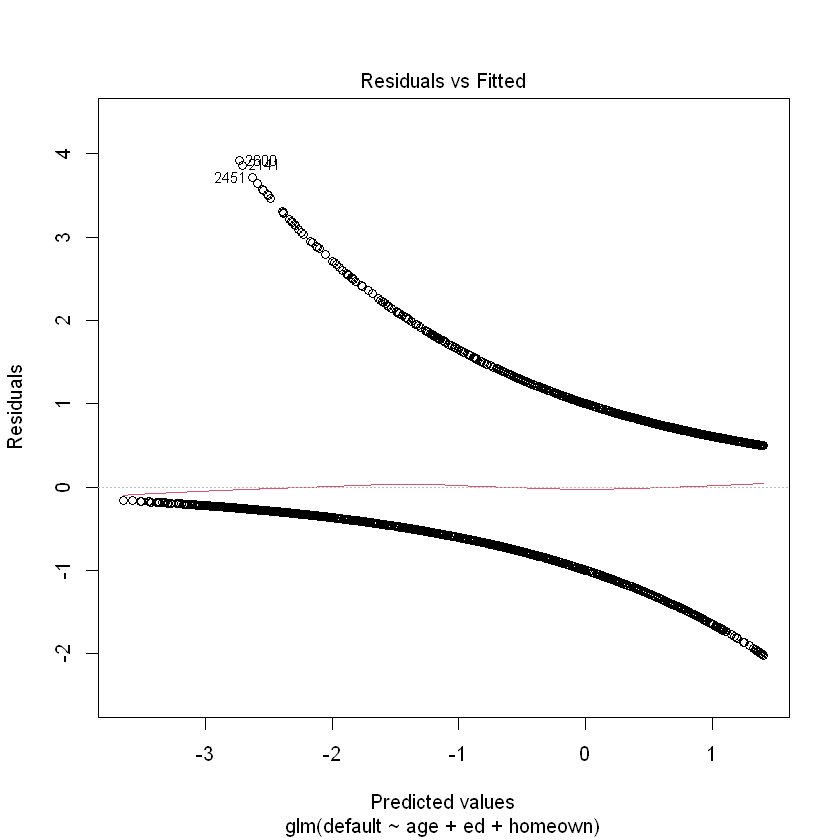

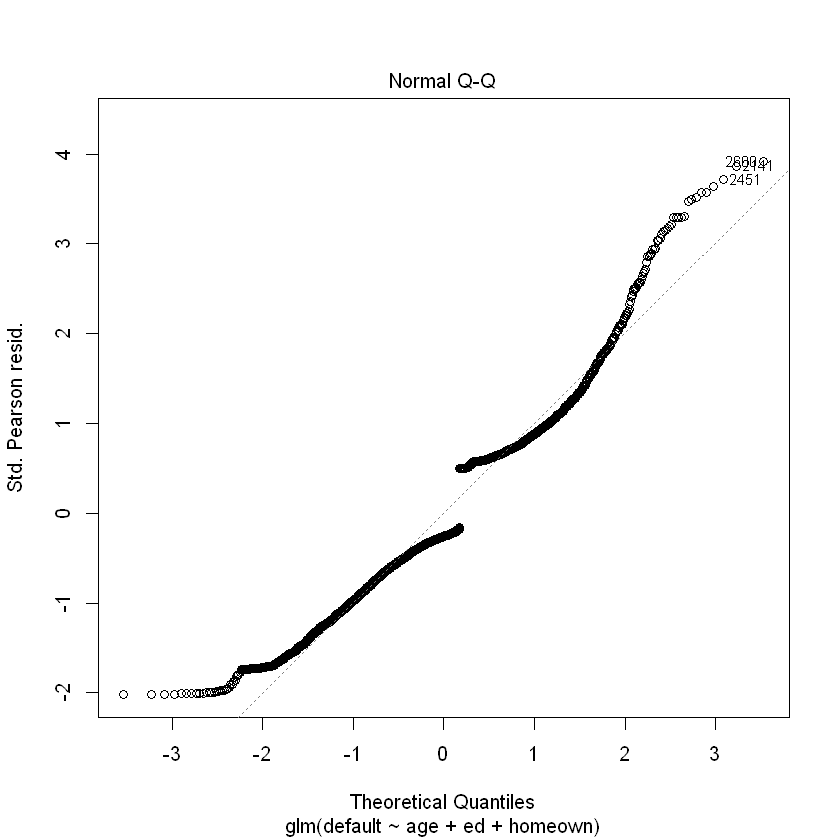

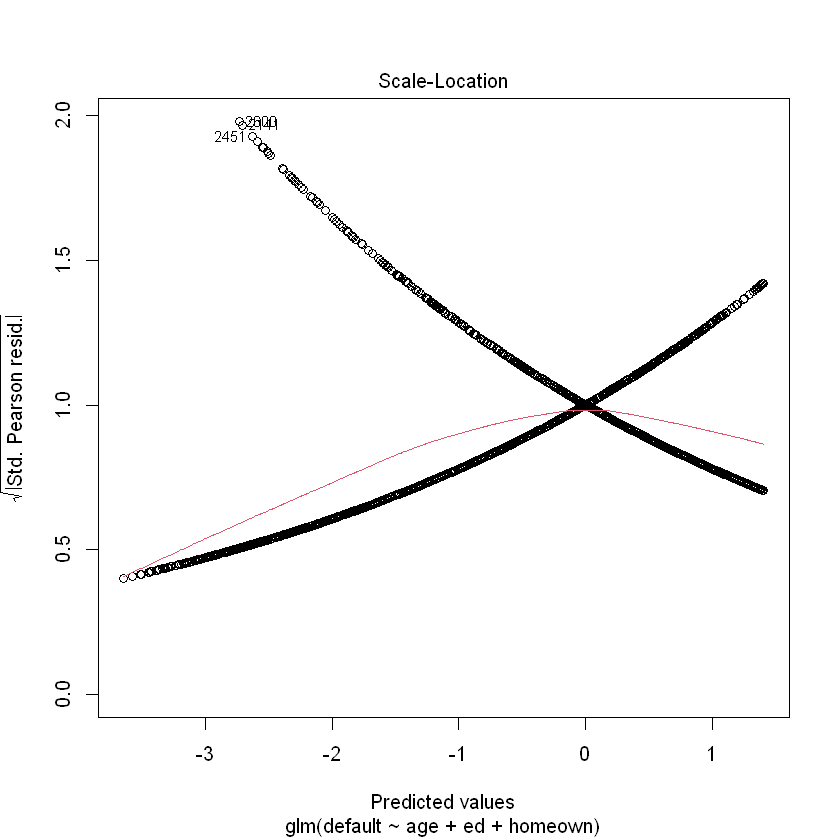

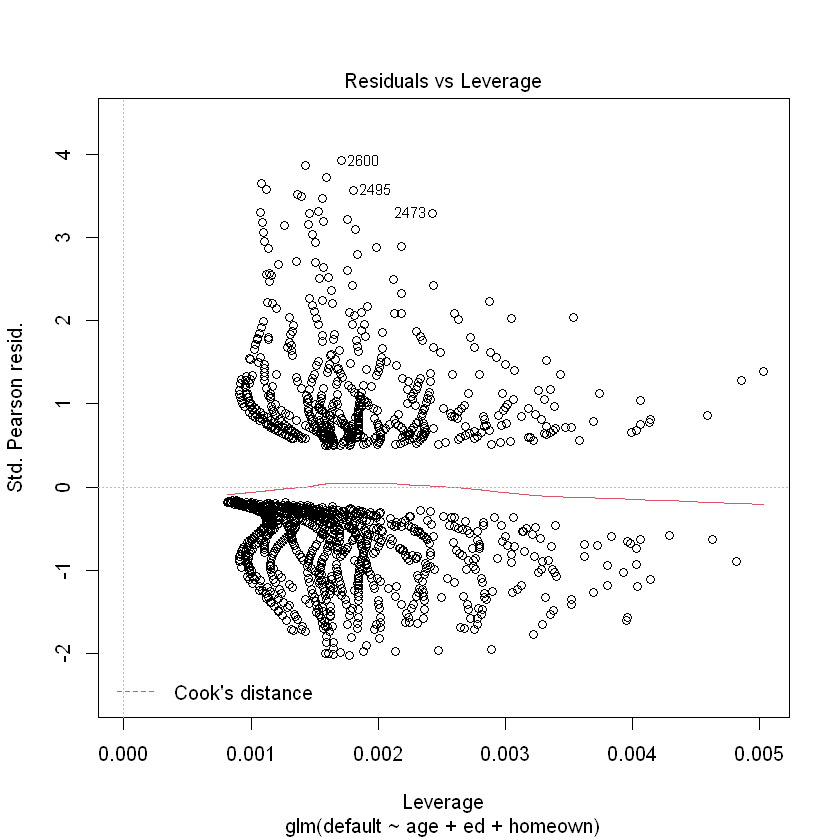

In [43]:
plot(logit)

# Source
http://www.sthda.com/english/articles/36-classification-methods-essentials/151-logistic-regression-essentials-in-r/#:~:text=Logistic%20regression%20is%20used%20to,%2C%20diseased%20or%20non%2Ddiseased.
for anova and deviance https://www.r-bloggers.com/2015/09/how-to-perform-a-logistic-regression-in-r/
https://towardsdatascience.com/how-to-do-logistic-regression-in-r-456e9cfec7cd